# 260 Final Project: Motion of Particles in Vortex Magnetic Fields


### Abstract
In this project, I will be trying to analyze the motion of currents in a toroidal magnetic field as produced in a tokamak. I will be looking at three cases, one with perfectly parallel field lines, produced by a vortex vector equation constrained by a torus, to try to observe curvature along the magnetic field. I will then construct another case, for a quarter slice of a tokamak produced by two loops of charge at 90 degrees from each other. This will help me analyze drift of the particles in the tokamak near walls, where the Magnetic field no longer behaves like a vortex field. I will try to create a model to show the difficulty of designing nuclear fusion reactors, and the usefulness of stellarators. The intention was to create something that would give an intuitive understanding of the motion of the particles given some initial position and velocity.

### Motivation
I wanted to work on this topic because my goal is to do research in plasma physics and fusion, so it’s exciting to understand the difficulties in making these fusion devices. Doing research for this project has already helped me gain insight into how these things work.

### Background
The project uses the lorentz force to calculate the forces on the particle, and Biot-savart law to calculate the magnetic fields of the loops. The rest is just Newton's laws and the basic relatiosnhips of position, velocity, acceleration and time.

### Model and Setup:
I will be using the Runge-Kutta method for simulating the trajectories. To produce the vortex magnetic field, I will be using $\vec{B} = <-\frac{y}{r},\frac{x}{r},0>$ Then, I will be using Biot-Savart law to calculate a magnetic field produced by two wire loops, and I will be using superposition to add the magnetic field vectors at each point from the contribution of each coil. Then, I used the runge-kutta method to plot the motion of the particle in the various magnetic fields. To simplify the model, I will be tracking the motion of a single particle as it moves through the field. I set all physical constants to be equal to one to simplify.



In [1132]:
##Import Libraries##
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d


# Section 1: Magnetic Vector Fields

In [1133]:
## Define Magnetic Field Functions##

def vortex_magnetic_field(particle_position):
    field = np.array([-particle_position[1]*(particle_position[1]**2+particle_position[0]**2)**-0.5,particle_position[0]*(particle_position[1]**2+particle_position[0]**2)**-0.5,0])
    return field
def vortex_magnetic_field_components(particle_position):
    field = np.array([-particle_position[1]*(particle_position[1]**2+particle_position[0]**2)**-0.5,particle_position[0]*(particle_position[1]**2+particle_position[0]**2)**-0.5,0])
    return field[0],field[1],field[2]
def wire_magnetic_field(particle_position):
    field = np.array([-particle_position[1]*(particle_position[1]**2+particle_position[0]**2)**-1.0,particle_position[0]*(particle_position[1]**2+particle_position[0]**2)**-1.0,0])
    return field
def wire_magnetic_field_components(particle_position):
    field = np.array([-particle_position[1]*(particle_position[1]**2+particle_position[0]**2)**-1.0,particle_position[0]*(particle_position[1]**2+particle_position[0]**2)**-1.0,0])
    return field[0],field[1],field[2]


In [1488]:
##Set up x-y gridpoints##
x, y = np.meshgrid(np.arange(-1, 1, 0.1),
                   np.arange(-1, 1, 0.1))
x = np.ravel(x)
y = np.ravel(y)
index = np.arange(np.size(x))
##Make empty arrays##
Bx=[]
By=[]

Imagine the following field lines as a slice of a cylinder of identical vector fields for all values of z.

<IPython.core.display.Javascript object>


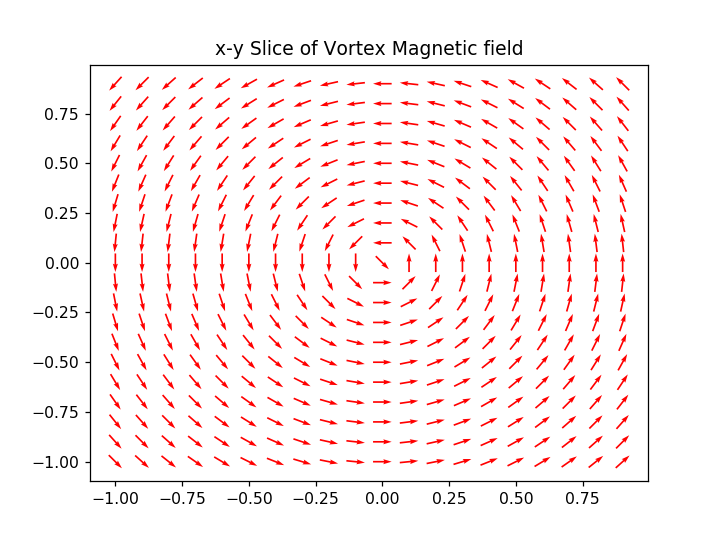

In [1489]:
%matplotlib notebook

##plot vortex field##
for i in index:  
    x_pos = x[i]
    y_pos = y[i]
    z_pos = 0
    
    Bi = np.array([x_pos,y_pos,z_pos])
    
    Bxi,Byi,Bzi = vortex_magnetic_field_components(Bi)
    ### this calculates the components of the field to be graphed
    x_sum=np.nansum(Bxi)
    y_sum=np.nansum(Byi)
    
    Bx.append(x_sum)
    By.append(y_sum)
    
Qplot = plt.quiver(x, y, 
                   Bx, By, 
                   color='r',
                    pivot = 'mid',scale= 30)
plt.title("x-y Slice of Vortex Magnetic field")
Bxarray = np.asarray(Bx)
Byarray = np.asarray(By)
Magnetic_field_array = np.array([Bx,By,0])


The above field is a magnetic field with perfectly uniform magnitude on all points in space, going around the z-axis. Ideally, if we were to wind a wire around a torus and create a solenoid, we would produce such a magnetic field near the center of a slice of the torus. Ideally then, particles located at the center of this torus would stay in the center and travel around in the uniform circular field for as long as the field is truned on. The below equation describes this field. This field would be confined to be inside the torus and very close to the center.
$$
       \vec{B} = <-\frac{y}{r},\frac{x}{r},0>
$$

$$|B| = \sqrt{\frac{y}{r}^2+\frac{x}{r}^2} = 1 $$


<IPython.core.display.Javascript object>


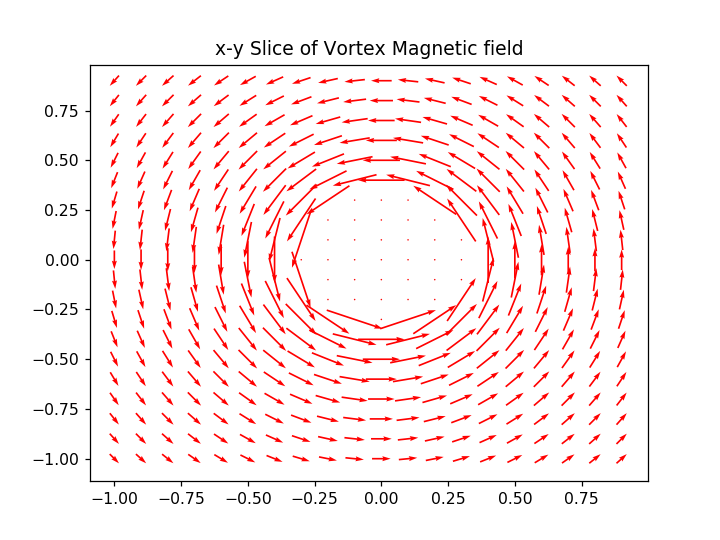

In [1164]:
##plot wire field##
%matplotlib notebook
for i in index:  
    x_pos = x[i]
    y_pos = y[i]
    z_pos = 0
    
    r = np.sqrt(x_pos**2 + y_pos**2 + z_pos**2)
    
  
    
    Bi = np.array([x_pos,y_pos,z_pos])
    
    
    Bxi,Byi,Bzi = wire_magnetic_field_components(Bi)
    
    if (Bxi**2+Byi**2>10):
        Bxi=0
        Byi=0
        
    Bx.append(Bxi)
    By.append(Byi)
   

Qplot = plt.quiver(x, y, 
                   Bx, By, 
                   color='r',
                    pivot = 'mid',scale= 30)
plt.title("x-y Slice of Vortex Magnetic field")
Bxarray = np.asarray(Bx)
Byarray = np.asarray(By)
Magnetic_field_array = np.array([Bx,By,0])

The above field would be produced by a wire passing along the z-axis described by $<0,0,t>$. This can be described by:

$$
       \vec{B} = <-\frac{y}{r^2},\frac{x}{r^2},0>
$$

$$|B| = \sqrt{\frac{y}{r^2}^2+\frac{x}{r^2}^2} = \frac{1}{r} $$
Note that the magnetic field strenght varies as a function of $\frac{1}{r}$

# Section 2: Trajectories
### For the following Exercise, imagine the particle as being constrained by a torus centered on the z-axis with arbitrary radii

In [1112]:
#### Calc Trajectory For Vortex ####
def calc_force_on_charge_by_bfield(magnetic_field, charge_velocity, q = 1):
    force = q*np.cross(charge_velocity, magnetic_field)
    return force
def calc_acceleration_of_charge_in_ebfields(magnetic_field, charge_velocity, q, m) :
    force = calc_force_on_charge_by_bfield(magnetic_field, charge_velocity,q)
    acceleration = force/m
    return acceleration
def get_updated_value(current_value, rate_of_change, dt) :

    updated_value = current_value+rate_of_change*dt
    return updated_value
def get_rates_of_change_runge_kutta(particle_position, particle_velocity, electric_field_function,
                                        magnetic_field_function, q, m, dt) :
    current_velocity, current_acceleration = get_rates_of_change_euler(particle_position, particle_velocity, electric_field_function,
                                        magnetic_field_function, q, m, dt)
    
    mid_particle_velocity = current_velocity + current_acceleration * dt/2
    mid_particle_position = particle_position + mid_particle_velocity * dt/2
    
    runge_kutta_velocity, runge_kutta_acceleration = get_rates_of_change_euler(mid_particle_position, mid_particle_velocity,
                                                                        electric_field_function,
                                                                        magnetic_field_function, q, m, dt)
    return runge_kutta_velocity, runge_kutta_acceleration

def create_place_holder_array(timesteps) :
    return np.zeros((timesteps.size,3))
def calc_trajectory_in_fields(magnetic_field_function, get_rate_of_change_euler, 
                              timesteps, particle_position, particle_velocity, q = 1, m=1) :


    position_evolution = create_place_holder_array(timesteps)
    velocity_evolution = create_place_holder_array(timesteps)
    
    dt = timesteps[1]  
    for inum, timestep in enumerate(timesteps) :

        position_evolution[inum,:] = particle_position
        velocity_evolution[inum,:] = particle_velocity
        
        position_rate_of_change, velocity_rate_of_change = \
            get_rates_of_change_euler(particle_position, particle_velocity,
                                        magnetic_field_function, q, m, dt)
        

        particle_position = get_updated_value(particle_position, position_rate_of_change, dt)
        particle_velocity = get_updated_value(particle_velocity, velocity_rate_of_change, dt)
        
    return position_evolution, velocity_evolution

<IPython.core.display.Javascript object>


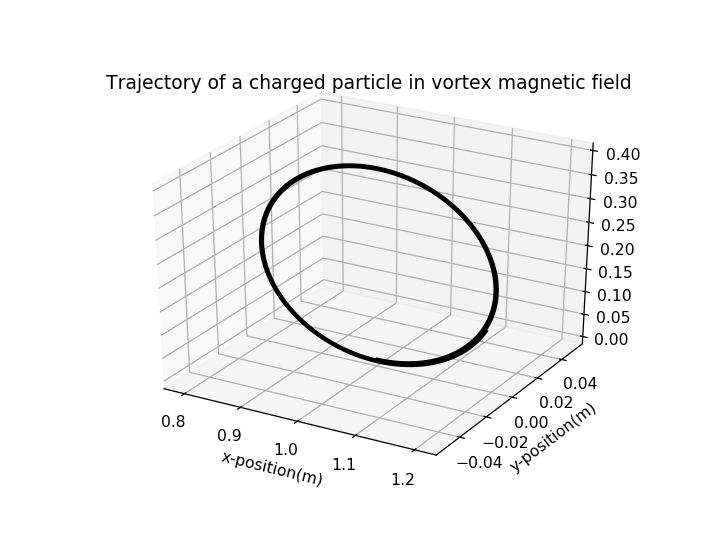

Text(0.5, 0, 'y-position(m)')

In [1491]:
initial_position = np.array([1,0,0])
initial_velocity = np.array([0.2,0,0])
dt = 40/10000
timesteps = np.arange(0,20,dt)

current_evolution = np.zeros((timesteps.size,3))

trajectory_evolution,velocity_evolution = calc_trajectory_in_fields(vortex_magnetic_field,get_rates_of_change_runge_kutta,timesteps,initial_position,initial_velocity)

velocity_evolution.shape
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(trajectory_evolution[:,0], trajectory_evolution[:,1], trajectory_evolution[:,2], 'black')
plt.title("Trajectory of a charged particle in vortex magnetic field")
plt.xlabel('x-position(m)')
plt.ylabel('y-position(m)')


In this case, the particle was not given a velocity parallel to the magnetic field. The particle moves like it is in a constant magnetic field, in a circular orbit. This particle would be considered confined

<IPython.core.display.Javascript object>


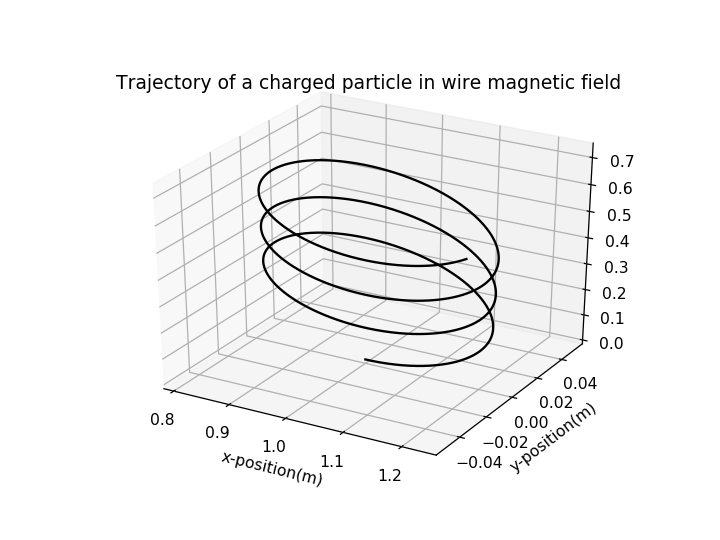

Text(0.5, 0, 'y-position(m)')

In [1493]:
initial_position = np.array([1,0,0])
initial_velocity = np.array([0.2,0,0])
dt = 40/10000
timesteps = np.arange(0,20,dt)

current_evolution = np.zeros((timesteps.size,3))

trajectory_evolution,velocity_evolution = calc_trajectory_in_fields(wire_magnetic_field,get_rates_of_change_runge_kutta,timesteps,initial_position,initial_velocity)

velocity_evolution.shape
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(trajectory_evolution[:,0], trajectory_evolution[:,1], trajectory_evolution[:,2], 'black')
plt.title("Trajectory of a charged particle in wire magnetic field")
plt.xlabel('x-position(m)')
plt.ylabel('y-position(m)')

In this case, we track the motion of the particle given the same initial conditions, but in the wire magnetic field. In this case, the particle drifts up. If the velocity is reversed, the particle drifts down. I believe this is showing the effect known as grad-B drift. When trying to keep the particle in one place, this is not good, as this particle would definitely hit the walls at some point. The effect does match what is described in the following texts.
Presentation on single-particle motion in plasma physics: https://www.tcd.ie/Physics/people/Peter.Gallagher/lectures/PlasmaPhysics/Lecture4_single_particle.pdf
Wikipedia Article on Stellarators:
https://en.wikipedia.org/wiki/Stellarator

<IPython.core.display.Javascript object>


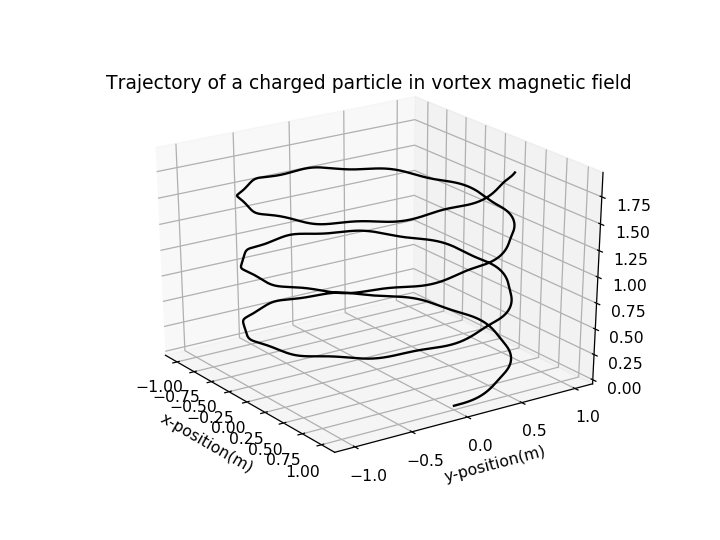

Text(0.5, 0, 'y-position(m)')

In [1495]:
initial_position = np.array([1,0,0])
initial_velocity = np.array([0,0.1,0])
dt = 40/10000
timesteps = np.arange(0,200,dt)

current_evolution = np.zeros((timesteps.size,3))

trajectory_evolution,velocity_evolution = calc_trajectory_in_fields(vortex_magnetic_field,get_rates_of_change_runge_kutta,timesteps,initial_position,initial_velocity)

velocity_evolution.shape
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(trajectory_evolution[:,0], trajectory_evolution[:,1], trajectory_evolution[:,2], 'black')
plt.title("Trajectory of a charged particle in vortex magnetic field")
plt.xlabel('x-position(m)')
plt.ylabel('y-position(m)')

Interestingly, when the particle is given only a tangential velocity, the particle spirals up. This was unexpected to me, but I could explain it to myself after imagining the particle taking small steps tangentially along the field, and applying the lorentz force law using right hand rule to show the direction of the force vector.

<IPython.core.display.Javascript object>


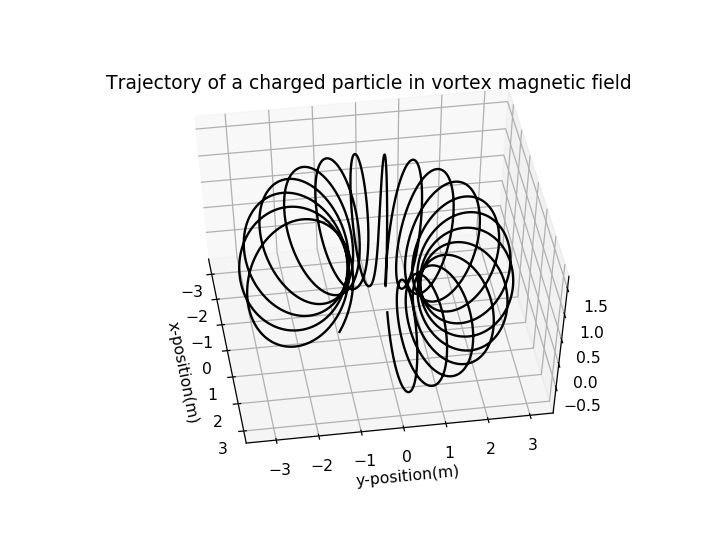

Text(0.5, 0, 'y-position(m)')

In [1502]:
initial_position = np.array([1,0,0])

initial_velocity = np.array([0,0.1,-1])
dt = 40/10000
timesteps = np.arange(0,120,dt)

current_evolution = np.zeros((timesteps.size,3))

trajectory_evolution,velocity_evolution = calc_trajectory_in_fields(vortex_magnetic_field,get_rates_of_change_runge_kutta,timesteps,initial_position,initial_velocity)
velocity_evolution.shape
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(trajectory_evolution[:,0], trajectory_evolution[:,1], trajectory_evolution[:,2], 'black')

plt.title("Trajectory of a charged particle in vortex magnetic field")
plt.xlabel('x-position(m)')
plt.ylabel('y-position(m)')


Finally, when I applied a significant downward velocity given the same tangential velocity, I caused the particle to orbit in the way shown. This is what confinement of the particle should look like, in the ideal case. This seems to be pretty stable, and I suspect the widening of the radius toward the end is due to rounding errors from the program. The particle does seem to be confined.

<IPython.core.display.Javascript object>


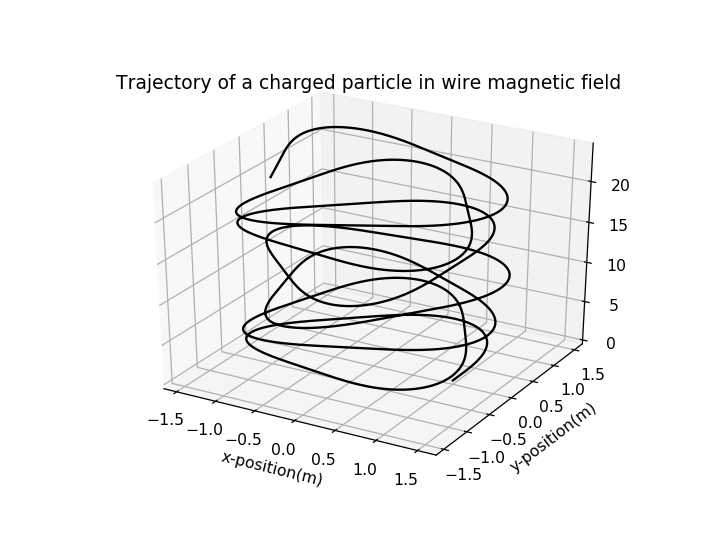

Text(0.5, 0, 'y-position(m)')

In [1508]:
initial_position = np.array([1,0,0])
initial_velocity = np.array([0,0.5,0])
dt = 40/10000
timesteps = np.arange(0,120,dt)

current_evolution = np.zeros((timesteps.size,2))

trajectory_evolution,velocity_evolution = calc_trajectory_in_fields(wire_magnetic_field,get_rates_of_change_runge_kutta,timesteps,initial_position,initial_velocity)


velocity_evolution.shape
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(trajectory_evolution[:,0], trajectory_evolution[:,1], trajectory_evolution[:,2], 'black')
plt.title("Trajectory of a charged particle in wire magnetic field")
plt.xlabel('x-position(m)')
plt.ylabel('y-position(m)')

In the case of the wire field, this motion is not as stable. However, the shapes of the orbits produced are very interesting. When viewed from the side, the motion looks quite chaotic, but when viewed from the top, they do seem to follow a pattern. I woud not consider this to be confined, however.

<IPython.core.display.Javascript object>


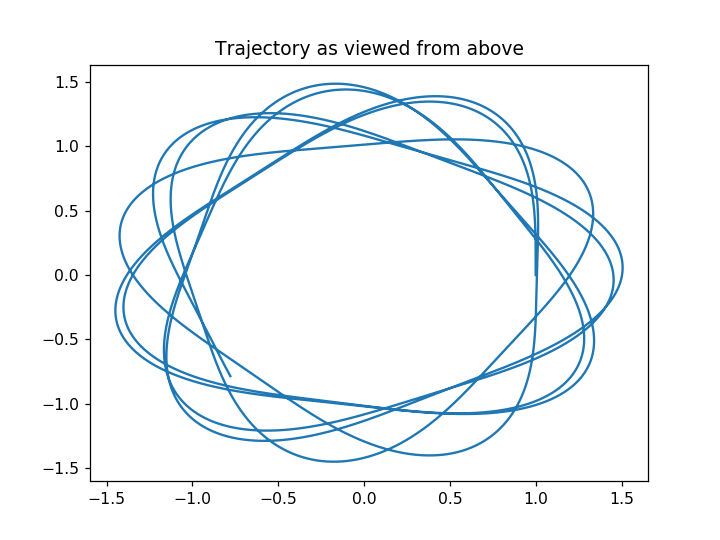

Text(0.5, 1.0, 'Trajectory as viewed from above')

In [1509]:
fig = plt.figure()
plt.plot(trajectory_evolution[:,0], trajectory_evolution[:,1])
plt.title("Trajectory as viewed from above")

Particle motion when viewed from the top

# Section 3: Computationally Generated Magnetic Field

In this next section, I will be using a computationally generated magnetic field rather than an analytically generated one. This required me to create a tool that would allow the functions to index into the array of field vectors as if it was a function of position. The rest of the program is like what we have already done in homework, using biot-savart law to calculate magnetic fields.

In [1258]:
def calc_bfield_at_point(grid_point, current_object, print_array_shapes=False) :
    '''This function expects a grid point x, y, z and a current object with attributes matching LineWireCurrent'''
        
    delta_r = np.array([grid_point[0] - current_object.xwire,
                        grid_point[1] - current_object.ywire,
                        grid_point[2] - current_object.zwire
                       ])  
    

    mu0 = current_object.mu0
    Idl = current_object.I * current_object.dl
    

    Idlxdelta_r = np.cross(Idl, delta_r, axisa=0, axisb=0, axisc=0)  # This has shape 3 x number_dl_segments
    cubed_normalization = np.linalg.norm(delta_r, axis=0)**3 # This has shape (number_dl_segments)
    biot_savart_integrand = np.divide(Idlxdelta_r, cubed_normalization)
    if print_array_shapes :
        print('shape of cross product', Idlxdelta_r.shape)
        print('shape of cubed_normalization', cubed_normalization.shape)
        print('shape of divide',np.divide(Idlxdelta_r, cubed_normalization).shape)
        print('Shape of the delta_r array is: ', delta_r.shape) 
    
   
    return mu0/(4*np.pi) * np.sum(biot_savart_integrand, axis=1)
num_sample_points = 100 #  This determines the resolution of the spatial grid
x_gridpts, y_gridpts, z_gridpts = np.meshgrid(np.array([0]),
                                              np.linspace(-4, 4, num_sample_points),
                                              np.linspace(-4, 4, num_sample_points),
                                              indexing='ij'  # Recall, this was to keep x, y, z ordering.
                                             )
stacked_gridpts = np.array([x_gridpts, y_gridpts, z_gridpts])

In [1348]:
class LoopWireCurrent() :
    def __init__(self, radius=2.0, dphi=np.pi/10, I=1.0) :
        '''The __init__ function is run when you initialize a LoopWireCurrent object.'''
        # The following simply creates "attributes" of the line of current
        self.phi = np.arange(0,2*np.pi, dphi)  # All of the dl's are little line segments in the x-direction
        self.dphi = dphi

        self.xwire = radius*np.cos(self.phi)
        self.ywire = radius*np.sin(self.phi)
        self.zwire = -2*np.ones(self.xwire.shape)
        
        
        # The most "complicated" part of the loop is calculating the dl vectors
        ds = 2*np.pi*radius / self.phi.size # Length of an arclet ds
        self.dl = ds*np.array([np.sin(self.phi),
                               -np.cos(self.phi),np.zeros(self.phi.size)]) 
        
        # Pick simple values for the constant mu_0 and the current.
        self.mu0 = 1
        self.I = I  
        

In [1349]:
class LoopWireCurrent2() :
    '''Define a loope of current. This is discretized by delta_phi.'''
    def __init__(self, radius=2.0, dphi=np.pi/10, I=1.0) :
        '''The __init__ function is run when you initialize a LoopWireCurrent object.'''
        # The following simply creates "attributes" of the line of current
        self.phi = np.arange(0,2*np.pi, dphi)  # All of the dl's are little line segments in the x-direction
        self.dphi = dphi

        self.xwire = radius*np.cos(self.phi)
        self.ywire = -2*np.ones(self.xwire.shape)
        self.zwire = radius*np.sin(self.phi)
        
        # The most "complicated" part of the loop is calculating the dl vectors
        ds = 2*np.pi*radius / self.phi.size # Length of an arclet ds
        self.dl = ds*np.array([np.sin(self.phi),
                               np.zeros(self.phi.size),
                               -np.cos(self.phi)]) 
        
        # Pick simple values for the constant mu_0 and the current.
        self.mu0 = 1
        self.I = I  
        

<IPython.core.display.Javascript object>


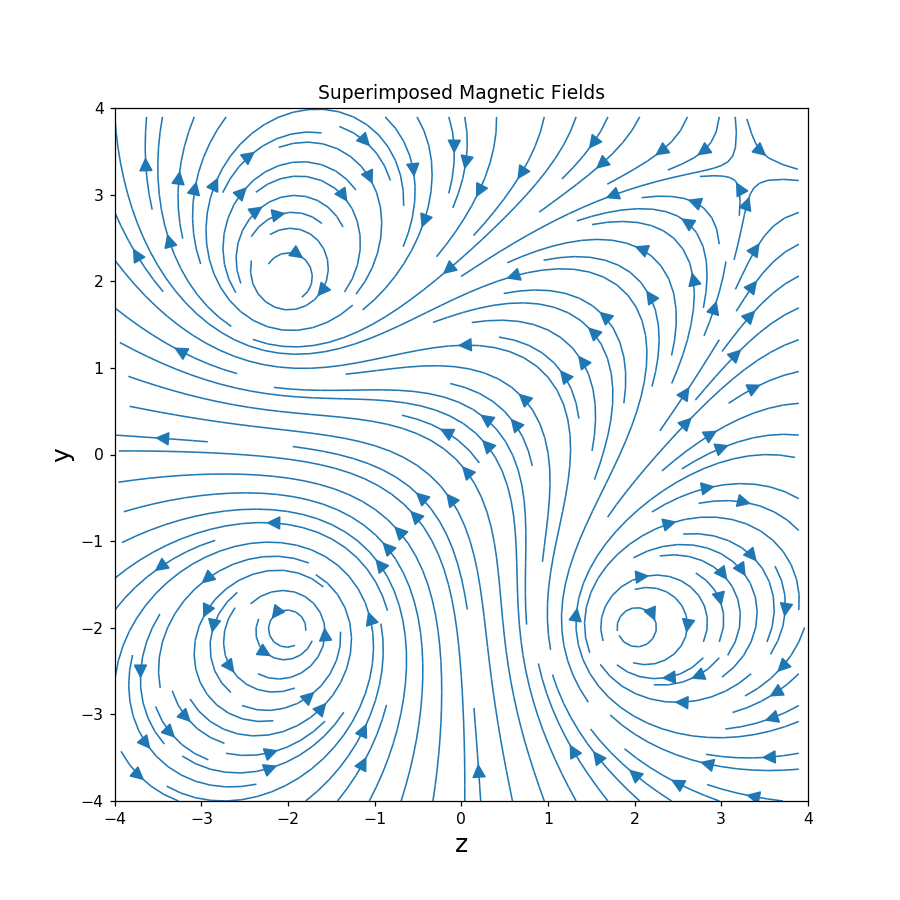

Text(0.5, 1.0, 'Superimposed Magnetic Fields')

In [1506]:
#  Calculate the magnetic field on your grid and plot

# These magnetic fields are for a vertical and horizontal loop, individually calculated
b_field_loop1 = np.apply_along_axis(calc_bfield_at_point, 0, stacked_gridpts, LoopWireCurrent(I=1.0))
b_field_loop2 = np.apply_along_axis(calc_bfield_at_point, 0, stacked_gridpts, LoopWireCurrent2(I=1.0))

b_field_loop = b_field_loop1+b_field_loop2 #this is the superposition of the two loops on top of each other




# Get things back into the shape of the desired meshgrid outputs:

B_y_loop = b_field_loop[1][0]
B_z_loop = b_field_loop[2][0]

fig, ax1 = plt.subplots(1, figsize=(8,8))
  # colors the arrows based on field strength

ax1.streamplot(z_gridpts[0], y_gridpts[0], B_z_loop, B_y_loop, linewidth=1, 
               cmap=plt.cm.inferno, density=1.5, arrowstyle='simple', arrowsize=1.5)



ax1.set_aspect('equal')
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
ax1.set_xlabel('z', fontsize=16)
ax1.set_ylabel('y', fontsize=16)
ax1.set_title('Superimposed Magnetic Fields')


The result of this integration and superposition is the above field. To simplify, I did not vary the field in the x-direction, as this would have made the program more complicated. The effect I am going for can still be observed without the field in the x-direction. I am also only using two loops. Realistically, there would be much more,  but that would again add comlexity.

In [1442]:
###Tool I made for indexing into the magnetic field like a function. This basically turns a numeric B-field list to
## a version that can be indexed into with particle positions###
'''
Bxarray = np.reshape(Bxarray, (20, 20))
Byarray = np.reshape(Byarray, (20, 20))
xarray = np.reshape(x, (20, 20))
yarray = np.reshape(y, (20, 20))

print(xarray[0,7],yarray[15,0],Bxarray[7,15],Byarray[7,15])  #### Getting the positions and fields from an index
'''
print(y_gridpts[0][50][0],z_gridpts[0][0][50],B_y_loop[50][50],B_z_loop[50][50])

def get_magnetic_field_at_position(Byarray,Bzarray,particle_position):
    
    
    
    yindex = int(np.round(particle_position[1],1)*12.25+50)
    zindex = int(np.round(particle_position[2],1)*12.25+50)
    fieldy = Byarray[yindex,zindex]
    fieldz = Bzarray[yindex,zindex]
    field = np.array([0,fieldy,fieldz])
    return field
get_magnetic_field_at_position(B_y_loop,B_z_loop,[0,4,4]) #### using the function to get the indices from the positions
###Above is the function I wrote to map float position coordinates to integer index values
def realistic_magnetic_field(particle_position):
    field =  get_magnetic_field_at_position(B_y_loop,B_z_loop,particle_position)
    return field
realistic_field_function([1,1,1])
#### This is the magnetic field "function"##

0.040404040404040664 0.040404040404040664 0.08443143197515258 -0.0844314319751526


array([ 0.       ,  0.0230458, -0.0230458])

In [1443]:
#### Calc Trajectory For Torus ####
def calc_force_on_charge_by_bfield(magnetic_field, charge_velocity, q = 1):
    force = q*np.cross(charge_velocity, magnetic_field)
    return force
def calc_acceleration_of_charge_in_ebfields(magnetic_field, charge_velocity, q, m) :
    force = calc_force_on_charge_by_bfield(magnetic_field, charge_velocity,q)
    acceleration = force/m
    return acceleration
def get_updated_value(current_value, rate_of_change, dt) :
    #  Your code here and below to return the updated value. 
    updated_value = current_value+rate_of_change*dt
    return updated_value
def get_rates_of_change_runge_kutta(particle_position, particle_velocity, electric_field_function,
                                        magnetic_field_function, q, m, dt) :
    current_velocity, current_acceleration = get_rates_of_change_euler(particle_position, particle_velocity, electric_field_function,
                                        magnetic_field_function, q, m, dt)
    
    mid_particle_velocity = current_velocity + current_acceleration * dt/2
    mid_particle_position = particle_position + mid_particle_velocity * dt/2
    
    # Calculate the acceleration due to the electric and magnetic fields at the mid_particle_position
    runge_kutta_velocity, runge_kutta_acceleration = get_rates_of_change_euler(mid_particle_position, mid_particle_velocity,
                                                                        electric_field_function,
                                                                        magnetic_field_function, q, m, dt)
    return runge_kutta_velocity, runge_kutta_acceleration

def create_place_holder_array(timesteps) :
    return np.zeros((timesteps.size,3))
def calc_trajectory_in_fields(magnetic_field_function, get_rate_of_change_euler, 
                              timesteps, particle_position, particle_velocity, q = 1, m=1) :

    # Create place holder arrays
    position_evolution = create_place_holder_array(timesteps)
    velocity_evolution = create_place_holder_array(timesteps)
    
    dt = timesteps[1]  # timesteps looks like np.array([0, dt, 2*dt, 3*dt, ...., (total_timesteps-1)*dt])
    for inum, timestep in enumerate(timesteps) :
        # Populate
        position_evolution[inum,:] = particle_position
        velocity_evolution[inum,:] = particle_velocity
        
        # Calculate velocity and acceleration due to e- and b-fields to update particle_position and particle_velocity
        position_rate_of_change, velocity_rate_of_change = \
            get_rates_of_change_euler(particle_position, particle_velocity,
                                        magnetic_field_function, q, m, dt)
        
        # Update
        particle_position = get_updated_value(particle_position, position_rate_of_change, dt)
        particle_velocity = get_updated_value(particle_velocity, velocity_rate_of_change, dt)
        
    return position_evolution, velocity_evolution

<IPython.core.display.Javascript object>


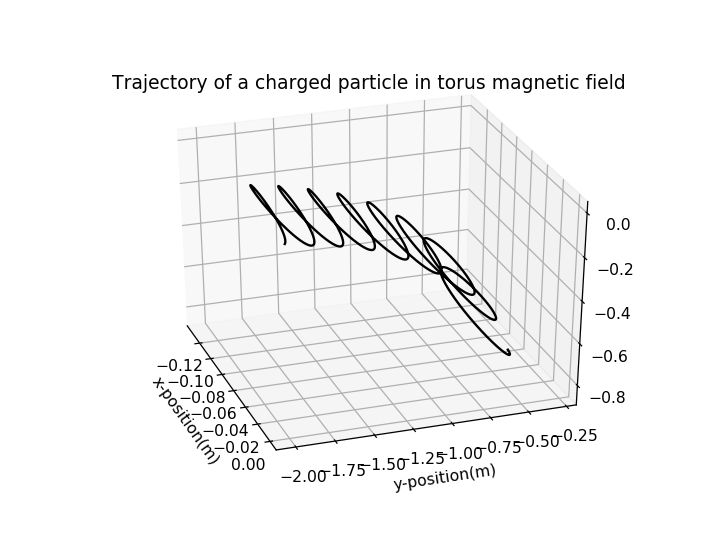

Text(0.5, 0, 'y-position(m)')

In [1501]:
initial_position = np.array([0,-2,0])
initial_velocity = np.array([0,0.01,0.01])
dt = 40/10000
timesteps = np.arange(0,200,dt)

current_evolution = np.zeros((timesteps.size,3))

trajectory_evolution,velocity_evolution = calc_trajectory_in_fields(realistic_magnetic_field,get_rates_of_change_runge_kutta,timesteps,initial_position,initial_velocity)

velocity_evolution.shape
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(trajectory_evolution[:,0], trajectory_evolution[:,1], trajectory_evolution[:,2], 'black')
plt.title("Trajectory of a charged particle in torus magnetic field")
plt.xlabel('x-position(m)')
plt.ylabel('y-position(m)')


This is the trjectory with a tangential and parallel velocity to the field near the center, at the point y=-2, z=0. The particle follows the curvature of the field and is relatively well-behaved. This is good for confinement.

<IPython.core.display.Javascript object>


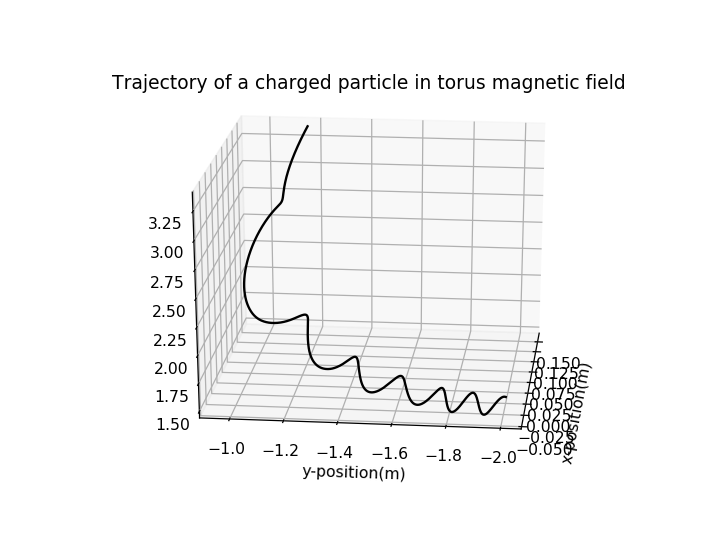

Text(0.5, 0, 'y-position(m)')

In [1500]:
initial_position = np.array([0,-2,1.5])
initial_velocity = np.array([0,0.01,0.01])
dt = 40/10000
timesteps = np.arange(0,200,dt)

current_evolution = np.zeros((timesteps.size,3))

trajectory_evolution,velocity_evolution = calc_trajectory_in_fields(realistic_magnetic_field,get_rates_of_change_runge_kutta,timesteps,initial_position,initial_velocity)

velocity_evolution.shape
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(trajectory_evolution[:,0], trajectory_evolution[:,1], trajectory_evolution[:,2], 'black')
plt.title("Trajectory of a charged particle in torus magnetic field")
plt.xlabel('x-position(m)')
plt.ylabel('y-position(m)')


Given the same velocity, but moved to z=1.5, the particle quickly drifts outside the bounds of the torus. It is still rougly following the magnetic field lines, but since they curl toward the walls at the edges, the particle hits the walls. This is bad for confinement.

### Results and Conclusions
I hope the above graphs show that long-term confinement of particles is only really feasible inside a torus either for particles very close to the center, or if the magnetic field inside could somehow be perfectly uniform. If these conditions are not met, long term could turn out to be very short. Any deviation form this ideal magnetic field setup, may it be a gradient in strength along the axis, or the shape of the field itself, makes confinement very difficult. In these reactors, any sort of imperfection in these fields could cause a loss in confinement. Even the difference in density of wires wrapped around the inside and outsde of the torus can cause a drift. Therefore, these effects must be reduced. In contrast to tokamaks, which are very simple shapes, stellarators twist in order to keep particles from drifting in any one way for mor than a short while. These schemes become much more complex, but are necessary to keep the plasma confined. I have also learned that the trajectories of the particles in these fields are very unstable, which made it difficult to get the correct velocities to cause the motion I was looking for. The smallest of changes would cause the particle to shoot off in one direction, or the trajectory to turn from a very nice curved spiral to a jumbled mess.

Presentation on single-particle motion in plasma physics: https://www.tcd.ie/Physics/people/Peter.Gallagher/lectures/PlasmaPhysics/Lecture4_single_particle.pdf

Wikipedia Article on Stellarators:
https://en.wikipedia.org/wiki/Stellarator

One more interesting presentation:
http://www.phys.nthu.edu.tw/~thschang/notes/PP02.pdf